IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

LOAD THE DATASET

In [9]:
df=pd.read_csv("C:/Users/perdonal/Desktop/ml-internship-2026/data/Mall_Customers.csv")
print(df.head)

<bound method NDFrame.head of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>


DATA CLEANING

In [11]:
df.isnull().sum()
df.duplicated().sum()
df.drop_duplicates()
df.columns=df.columns.str.replace(" ","_")
print (df.columns)


Index(['CustomerID', 'Genre', 'Age', 'Annual_Income_(k$)',
       'Spending_Score_(1-100)'],
      dtype='str')


FEATURE SELECTION

In [12]:
X=df[["Annual_Income_(k$)","Spending_Score_(1-100)"]]

SCALING

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled= scaler.fit_transform(X)

NUMBER OF CLUSTERS (ELBOW METHOD)

In [19]:
from sklearn.cluster import KMeans
wcss= []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


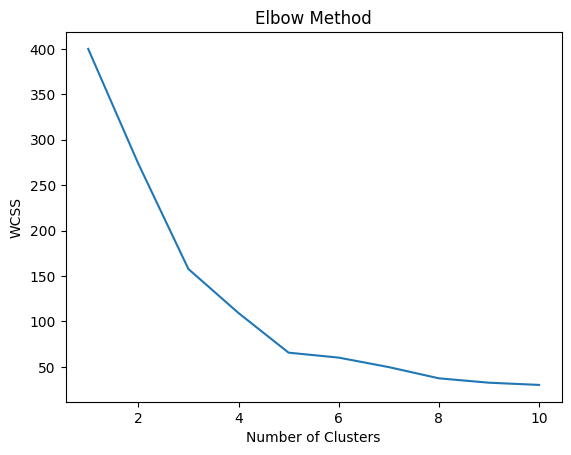

In [20]:
plt.plot(range(1,11),wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

THE MODEL (THE CORE)

In [23]:
kmeans=KMeans(n_clusters=5,random_state=42)
clusters=(kmeans.fit_predict(X_scaled))
df['Cluster']= clusters

VISUALIZATION

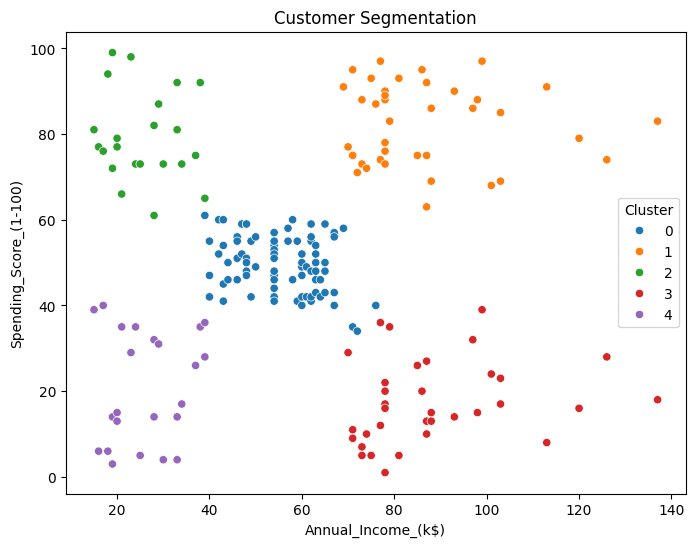

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df["Annual_Income_(k$)"],
    y=df['Spending_Score_(1-100)'],
    hue=df['Cluster'],
    palette='tab10'
)
plt.title("Customer Segmentation")
plt.show()

### BUSINESS INTERPRETATION

1) High income + high spending → premium customers

2) High income + low spending → potential upsell targets

3) Low income + high spending → discount-driven buyers

4) Low income + low spending → low priority